In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.rc("axes", unicode_minus=False)
plt.rc("font", family="Malgun Gothic")

import pandas as pd

In [4]:
df = pd.read_excel("Data/sample-line.xlsx", index_col='종목명')
print(df.shape)
df.head()

(50, 12)


,N,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,토론실
종목명,,,,,,,,,,,,
삼성전자,1,59700,200,-0.0033,100,3563960,5969783,55.95,24400594,18.68,8.69,NaN
SK하이닉스,2,82900,500,-0.0060,5000,603514,728002,48.86,2872177,26.40,4.25,NaN
NAVER,3,301000,4000,-0.0131,100,494433,164263,55.49,755573,70.16,10.56,NaN
LG화학,4,692000,12000,0.0176,5000,488499,70592,37.61,541159,119.29,1.84,NaN
삼성바이오로직스,5,715000,6000,-0.0083,2500,473080,66165,10.16,75060,137.74,4.77,NaN


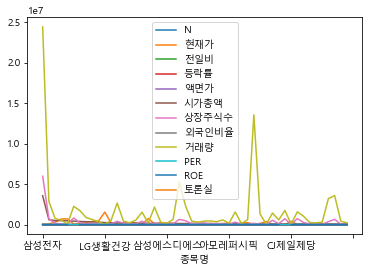

In [5]:
ax = df.plot()

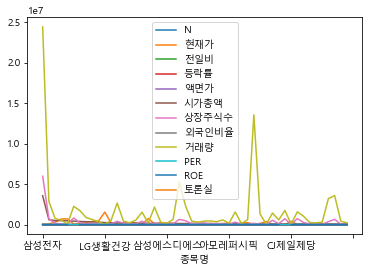

In [6]:
df.plot()

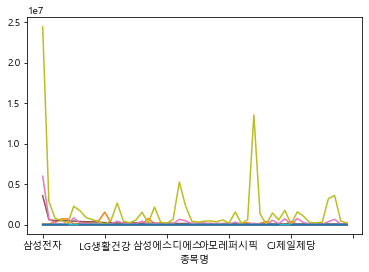

In [11]:
ax = df.plot(legend=False)
figure = ax.figure
figure.savefig('코스피 종목별 일일주식현황.png', dpi=300)

In [12]:
%ls *.png    # 생성한 그림 찾기

 C 드라이브의 볼륨: OS
 볼륨 일련 번호: 1C69-8763

 C:\Users\user\Desktop\Sev_AI\파이썬시각화 디렉터리

2020-10-09  오후 09:02           102,448 코스피 종목별 일일주식현황.png
               1개 파일             102,448 바이트
               0개 디렉터리  578,614,255,616 바이트 남음


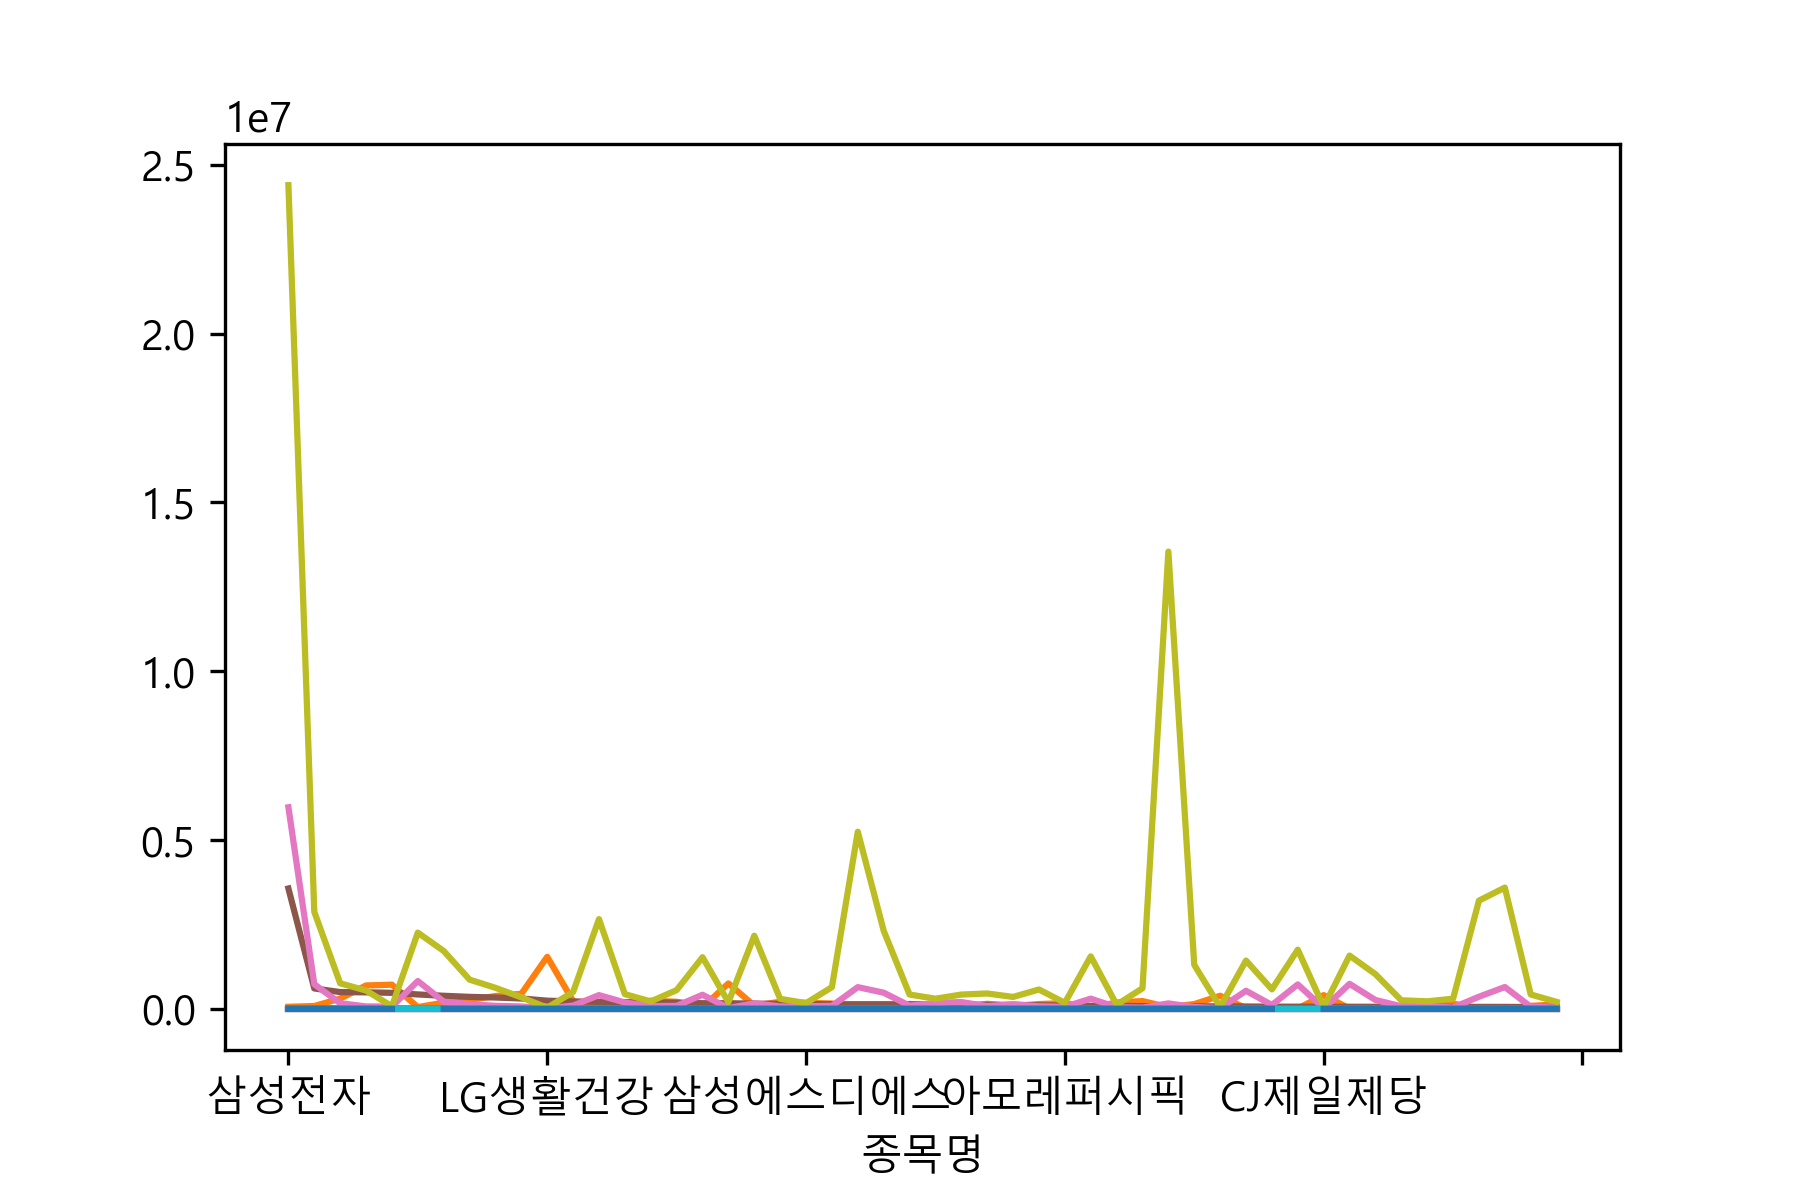

In [26]:
from IPython.display import Image     
Image('코스피 종목별 일일주식현황.png')   # 이미지 불러오기 (주피터 노트북에 이미지 추가하기와 동일함)

### 차트 이미지를 엑셀에 반영하기
- Figure를 이미지 파일로 저장해서, 엑셀에 수동을 붙여넣기
- Figure를 이미지로 저장해서, 이미지를 클립보드에 복사한 후에 엑셀에 수동으로 붙여넣기
- Figure를 xlwings를 통해, 엑셀에 바로 붙여넣기:  
  (1) 엑셀 UI 자동화 라이브러리: 엑셀프로그램 필수/윈도우 엑셀 2007이상/ 맥엑셀 2016 이상 지원
  (2) Anaconda Python에 기본 포함: conda install xlwings 혹은 pip install xlwings

In [17]:
import xlwings as xw

In [18]:
xw.__version__

'0.20.7'

#%% Figure를 엑셀에 추가하기 Usage:

> sheet.pictures.add(img,lnk_to_file=False, save_with_document=True, left=0, top=0, width=None,height=None,  
>                    name=None, update=False)              
> (1)name: 각 Picture에 대한 식별자/ 지정하지 않으면 "Picture 일련번호" 형식으로 자동 지정  
> (2)update = False 일 경우, ShapeAlreadyExists 예외 발생에 유의

In [21]:
# 엑셀을 미리 열고, 다음 명령어를 쓴다
sheet = xw.sheets.active   
sheet

<Sheet [통합 문서1]Sheet1>

In [23]:
sheet.pictures   # 목록이 비어있음: Pictures([])

Pictures([])

In [24]:
sheet.pictures.add(figure)    # 엑셀에 figure가 붙어있음 확인

<Picture 'Picture 2' in <Sheet [통합 문서1]Sheet1>>

In [25]:
sheet.pictures.add(figure, name="코스피 종목별 일일현황", update=True)    # 엑셀에 figure가 붙고, 반복실행하더라도 이미지만 업데이트되지만 추가되지 않음(일반적인 활용 형식)

<Picture '코스피 종목별 일일현황' in <Sheet [통합 문서1]Sheet1>>

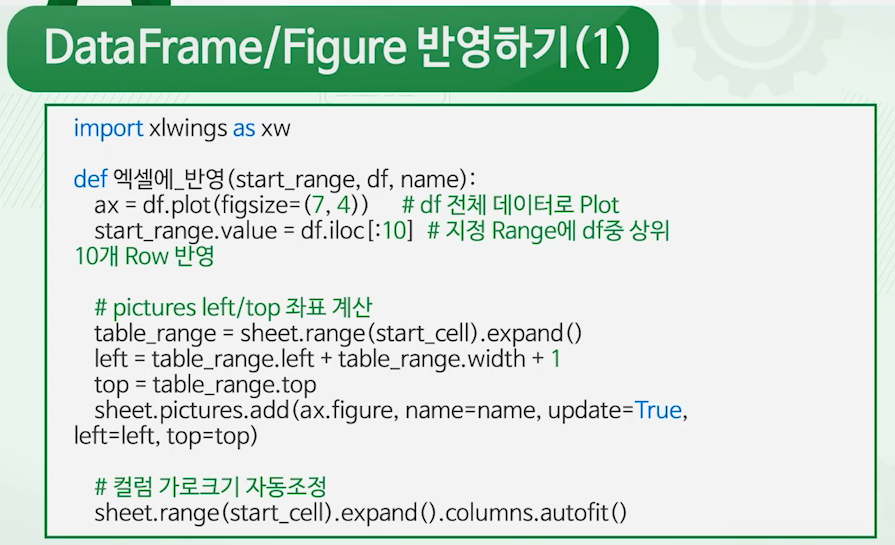

In [29]:
Image("엑셀figure넣기.png")

### 현재 데이터프레임을 엑셀에 반영하기

In [31]:
xw.view(df)    # 엑셀에 현재 데이터프레임 값이 입력됨

In [34]:
xw.view(df, sheet=sheet)

In [35]:
# 일부 값을 발취해서 반영하고 싶은 경우

df.iloc[:10]

,N,현재가,전일비,등락률,액면가,시가총액,상장주식수,외국인비율,거래량,PER,ROE,토론실
종목명,,,,,,,,,,,,
삼성전자,1,59700,200,-0.0033,100,3563960,5969783,55.95,24400594,18.68,8.69,NaN
SK하이닉스,2,82900,500,-0.0060,5000,603514,728002,48.86,2872177,26.40,4.25,NaN
NAVER,3,301000,4000,-0.0131,100,494433,164263,55.49,755573,70.16,10.56,NaN
LG화학,4,692000,12000,0.0176,5000,488499,70592,37.61,541159,119.29,1.84,NaN
삼성바이오로직스,5,715000,6000,-0.0083,2500,473080,66165,10.16,75060,137.74,4.77,NaN
삼성전자우,6,51700,300,0.0058,100,425432,822887,86.71,2256303,16.18,NaN,NaN
현대차,7,180500,2500,-0.0137,5000,385671,213668,31.40,1713336,26.01,4.32,NaN
셀트리온,8,262000,1500,0.0058,1000,353684,134994,21.00,864365,88.36,11.19,NaN
카카오,9,379000,1500,-0.0039,500,334459,88248,31.88,621768,-216.57,-5.81,NaN


In [37]:
#% 실습[1]
xw.view(df.iloc[:10], sheet=sheet)

In [39]:
#% 실습[2]
sheet.range('A1').value = df  # xw.view(df) 와 동일한 기능

In [40]:
#% 실습[3]
sheet.range('A1').value = df.iloc[:10]

In [43]:
#% 실습[4]
left = sheet.range('O1').left 
top = sheet.range('O1').top
sheet.pictures.add(figure, name="코스피 종목별 일일주식현황.png", update=True, left=left, top=top)

<Picture '코스피 종목별 일일주식현황.png' in <Sheet [통합 문서1]Sheet1>>

In [46]:
#% 실습[5]: 빈공간이 있는 곳에 피규어를 넣고 싶을 때

table_range = sheet.range('A1').expand()
pic_left = table_range.left + table_range.width + 1 
pic_top = table_range.top
sheet.pictures.add(figure, name="코스피 종목별 일일주식현황.png", update=True, left=left, top=top)

<Picture '코스피 종목별 일일주식현황.png' in <Sheet [통합 문서1]Sheet1>>

In [47]:
#% 실습[6]: 빈공간이 있는 곳에 피규어를 넣고 싶을 때

table_range = sheet.range('A1').expand()
pic_left = table_range.left + table_range.width + 1 
pic_top = table_range.top
sheet.pictures.add(figure, name="코스피 종목별 일일주식현황.png", update=True, left=left, top=top)
table_range.columns.autofit()

### 엑셀에 데이터프레임 반영하는 함수 코드 예

In [58]:
def fit_in_to_excel(start_range, df, name):
    ax = df.plot(figsize=(7,4))
    start_range.value = df.iloc[:10]
    
    table_range = start_range.expand()
    pic_left = table_range.left + table_range.width + 1 
    pic_top = table_range.top
    sheet.pictures.add(ax.figure, name="코스피 종목별 일일주식현황.png", update=True, left=left, top=top)
    
    table_range.columns.autofit()

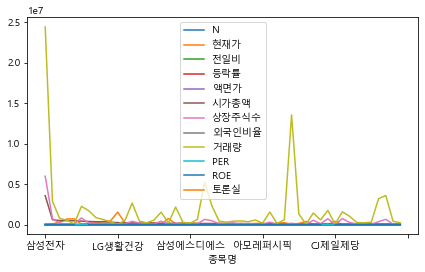

In [59]:
fit_in_to_excel(xw.Range('C3'), df, '코스피 종목별 일일주식현황')

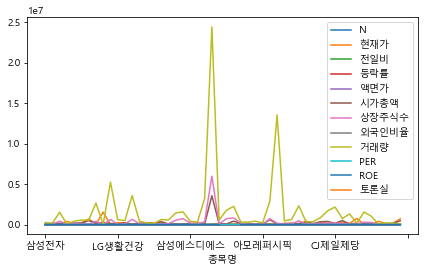

In [62]:
#% 데이터 변화를 반영하고 싶을 때, 

index = df.index
sample_df = df.sample(frac=1).reset_index(drop=True)
sample_df.index = index

fit_in_to_excel(xw.Range('C3'), sample_df, '코스피 종목별 일일주식현황')